In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
import pandas as pd
A = pd.read_csv("D:/Work/Gaurav/ETLHIVE/Data sets/monthly.csv")

In [3]:
A.columns = ["Date","Gold_Price"]
A.head()

,Date,Gold_Price
0,1950-01,34.73
1,1950-02,34.73
2,1950-03,34.73
3,1950-04,34.73
4,1950-05,34.73


In [4]:
A.index = pd.to_datetime(A.Date)
A = A.drop(labels=["Date"],axis=1)

In [5]:
A

,Gold_Price
Date,
1950-01-01,34.730
1950-02-01,34.730
1950-03-01,34.730
1950-04-01,34.730
1950-05-01,34.730
...,...
2019-01-01,1291.630
2019-02-01,1319.755
2019-03-01,1302.286


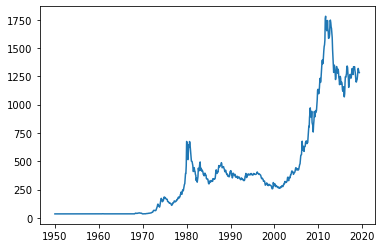

In [6]:
import matplotlib.pyplot as plt
plt.plot(A)

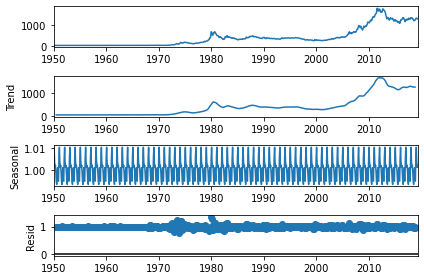

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose
seasonal_decompose(A,"multiplicative").plot()
plt.show()

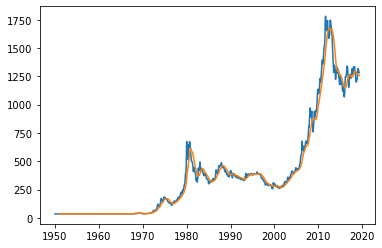

In [8]:
plt.plot(A)
plt.plot(A.rolling(window=12).mean())

In [9]:
from numpy import log
B = log(A) - log(A).rolling(window=12).mean()

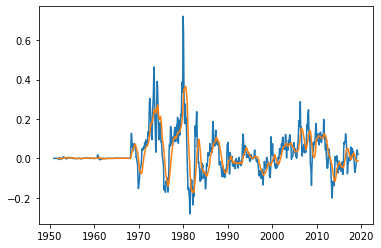

In [10]:
plt.plot(B)
plt.plot(B.rolling(window=12).mean())

In [11]:
B.isna().sum()

Gold_Price    11
dtype: int64

In [12]:
B.shape

(833, 1)

In [13]:
C = B[B.Gold_Price.isna() == False]

# Divide Data in to Training & Testing Set

In [14]:
trd = C[0:658]
tsd = C[658:822]

In [15]:
from statsmodels.tsa.ar_model import AR
auto_reg = AR(trd)
model = auto_reg.fit()

C:\Users\pujad\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [16]:
tsd

,Gold_Price
Date,
2005-10-01,0.075274
2005-11-01,0.082285
2005-12-01,0.137096
2006-01-01,0.191124
2006-02-01,0.179512
...,...
2019-01-01,0.020477
2019-02-01,0.042899
2019-03-01,0.031050


In [17]:
model.predict(start="2005-10-01", end="2019-05-01")

2005-10-01    0.062992
2005-11-01    0.067558
2005-12-01    0.053331
2006-01-01    0.040952
2006-02-01    0.039839
                ...   
2019-01-01    0.022322
2019-02-01    0.022322
2019-03-01    0.022322
2019-04-01    0.022322
2019-05-01    0.022322
Freq: MS, Length: 164, dtype: float64

In [18]:
from numpy import exp
A = exp(B + log(A).rolling(window=12).mean())

In [19]:
A

,Gold_Price
Date,
1950-01-01,NaN
1950-02-01,NaN
1950-03-01,NaN
1950-04-01,NaN
1950-05-01,NaN
...,...
2019-01-01,1291.630
2019-02-01,1319.755
2019-03-01,1302.286
